### Classic Ising Model (3 bit)

In [1]:
import numpy as np
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import itertools
import scipy


## Define global params
J = 1.
M = 1.
beta = 0.15
n = 3


## Define a function to calculate the hamiltonian for a given spin config
def get_H(spin_config):
    length = len(spin_config)
    
    E_tot = 0.
    for i in range(length-1):
        E_ij = -J*spin_config[i]*spin_config[i+1]
        M_i = -M*spin_config[i]
        E_tot = E_tot + E_ij + M_i
     
    ## add in the contribution from PBC
    E_tot = E_tot - J*spin_config[-1]*spin_config[0] -M*spin_config[-1]
    
    return(E_tot)


## Define a function to return all spin configs of size n
def all_configs(n):
    final_array = []
    for i in itertools.product('01', repeat=n):
        empty_list = []
        for each in i:
            if each == '0':
                empty_list.append(-1)
            else:
                empty_list.append(1)
        final_array.append(empty_list)
    return(final_array)
    
    for i in range(np.power(2,n)):
        print(i)


## Calculate Rate Matrix W
spin_configs = all_configs(n)
pi_vector = []
for config in spin_configs:
    H = get_H(config)
    pi_vector.append(np.exp(-beta*H))
pi_vector = pi_vector/np.sum(pi_vector) ## normalize
    
PI = np.diag(pi_vector)
R = np.ones((np.power(2,n),np.power(2,n)))  # assume R is a matrix of all ones
W = np.matmul(R,PI)-np.diag(np.matmul(R,pi_vector))

W = np.transpose(W)
# Make sure columns sum to zero
for col in range(np.power(2,n)):
    if np.abs(np.sum(W[:,col])) > 1e-14:
        print("ERROR - cols should sum to one",np.sum(W[col,:]))
        
## Initialize distribution and evolve
t_array = np.linspace(0,10,70)
p_0 = [1/2.,0.,0.,0.,0.,0.,0.,1/2.]

def dp_dt(p_array,t):
    return np.matmul(W,p_array)

print("Starting Integration...")
p_array = scipy.integrate.odeint(dp_dt,p_0,t_array)
print("Done")

Starting Integration...
Done


Starting...


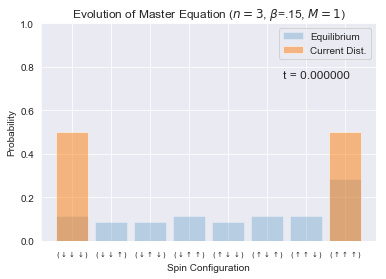

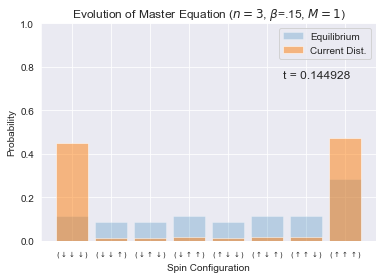

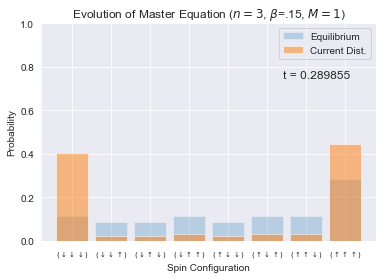

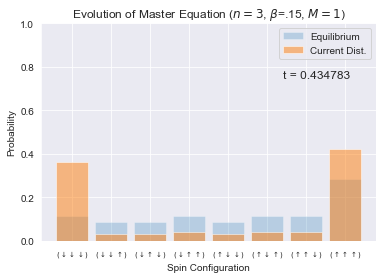

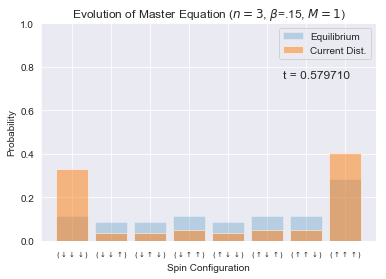

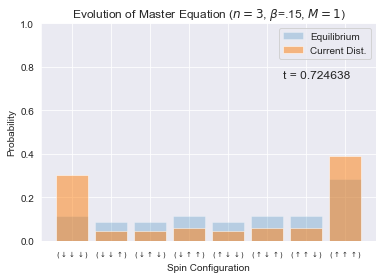

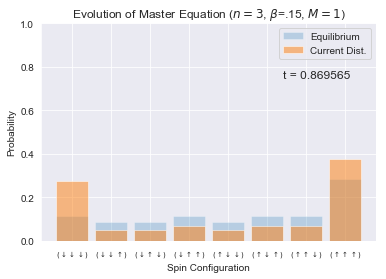

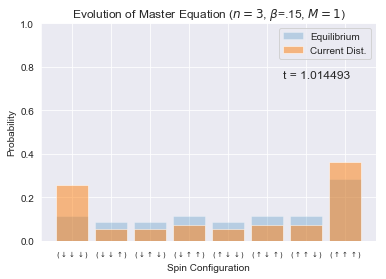

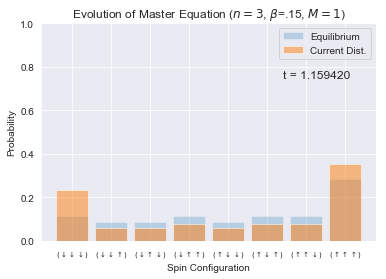

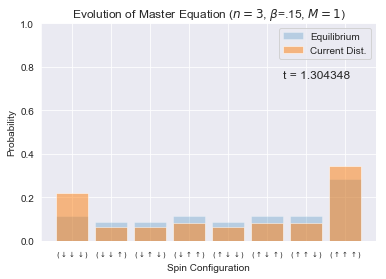

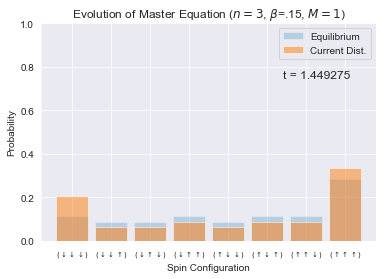

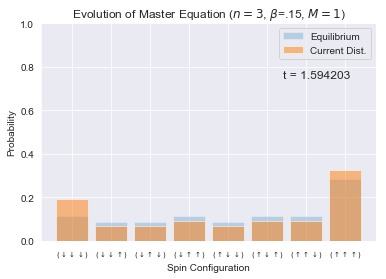

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

print("Starting...")
for i in range(np.shape(p_array)[0]):
    plt.bar(np.arange(len(p_array[0])),pi_vector,alpha=0.25,label='Equilibrium')
    plt.bar(np.arange(len(p_array[0])),p_array[i],alpha=0.5,label='Current Dist.')
    plt.xticks(np.arange(len(p_array[0])),[r'$(\downarrow\downarrow\downarrow)$',r'$(\downarrow\downarrow\uparrow)$',r'$(\downarrow\uparrow\downarrow)$',r'$(\downarrow\uparrow\uparrow)$',r'$(\uparrow\downarrow\downarrow)$',r'$(\uparrow\downarrow\uparrow)$',r'$(\uparrow\uparrow\downarrow)$',r'$(\uparrow\uparrow\uparrow)$'],size=7)
    plt.annotate('t = {:f}'.format(t_array[i]),(5.4,0.75),size=12)
    plt.ylabel('Probability')
    plt.xlabel('Spin Configuration')
    plt.title(r'Evolution of Master Equation ($n=3$, $\beta$=.15, $M=1$)')
    fname = 'file_'+'{:04d}'.format(i)+'.png'
    plt.ylim((0.0,1.0))
    plt.legend()
    plt.savefig('/Users/jakehanson/Desktop/Stochastic_Thermo/Code/gif_data/'+fname)
    plt.show()
print("Done")

#### Notes
- A uniform distribution is a stable point for this system (dp/dt = 0)

In [46]:
import itertools

def all_configs(n):
    final_array = []
    for i in itertools.product('01', repeat=n):
        empty_list = []
        for each in i:
            if each == '0':
                empty_list.append(-1)
            else:
                empty_list.append(1)
        final_array.append(empty_list)
    return(final_array)
    
print(all_configs(4))

[[-1, -1, -1, -1], [-1, -1, -1, 1], [-1, -1, 1, -1], [-1, -1, 1, 1], [-1, 1, -1, -1], [-1, 1, -1, 1], [-1, 1, 1, -1], [-1, 1, 1, 1], [1, -1, -1, -1], [1, -1, -1, 1], [1, -1, 1, -1], [1, -1, 1, 1], [1, 1, -1, -1], [1, 1, -1, 1], [1, 1, 1, -1], [1, 1, 1, 1]]


In [93]:
W = [[1,2],[-2,-4]]
P = [1,1]

X = 
print(np.matmul(W,P))

[ 3 -6]
